In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-campaign/marketing_campaign.csv
/kaggle/input/customer-segmentation/marketing_campaign.csv


In [64]:
import pandas as pd

# Load the dataset with the correct separator
file_path = '/kaggle/input/marketing-campaign/marketing_campaign.csv'
data = pd.read_csv(file_path, sep='\t')

# Display the first few rows
print(data.head())

# Display basic info about the dataset
print(data.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [78]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [79]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [80]:
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [81]:
# Check for any remaining missing values
missing_values = data.isnull().sum()
print(missing_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [82]:
# Checking for outliers in numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers_summary = outliers.sum()
print(outliers_summary)

ID                       0
Year_Birth               3
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
AcceptedCmp1           144
AcceptedCmp2            30
Complain                21
Z_CostContact            0
Z_Revenue                0
Response               334
dtype: int64


In [83]:
# Removing rows where outliers are identified
data_no_outliers = data[~outliers.any(axis=1)]

In [84]:
# Clipping the outliers to the IQR range
data_clipped = data.copy()
for col in numeric_columns:
    data_clipped[col] = data[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])

In [85]:
import numpy as np

# Apply log transformation to skewed columns
data_log = data.copy()
for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    data_log[col] = np.log1p(data_log[col])

In [86]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding 'ID' or any other non-numerical columns)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Convert the scaled data back to a DataFrame for easier interpretation
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)

# Optional: Check the scaled data
print(data_scaled_df.head())

         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.235327 -0.825218 -0.929894  0.307039  0.983781   
1 -1.053058   -1.235733 -0.235826  1.032559  0.906934 -0.383664 -0.870479   
2 -0.447070   -0.317643  0.773633 -0.825218 -0.929894 -0.798086  0.362723   
3  0.181716    1.268149 -1.022732  1.032559 -0.929894 -0.798086 -0.870479   
4 -0.082614    1.017761  0.241519  1.032559 -0.929894  1.550305 -0.389085   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0   1.551577         1.679702         2.462147  ...           0.693904   
1  -0.636301        -0.713225        -0.650449  ...          -0.130463   
2   0.570804        -0.177032         1.345274  ...          -0.542647   
3  -0.560857        -0.651187        -0.503974  ...           0.281720   
4   0.419916        -0.216914         0.155164  ...          -0.130463   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0      -0.28014  

In [87]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
k = 4

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Check the clusters
print(data[['Cluster']].head())

   Cluster
0        1
1        0
2        1
3        0
4        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
# Count the number of points in each cluster
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    1027
2     592
1     450
3     171
Name: count, dtype: int64


In [89]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[ 0.01983001  0.23937145 -0.69504451  0.66715386 -0.12505233  0.00691618
  -0.78338378 -0.53700686 -0.63791839 -0.55430267 -0.53496097 -0.55345878
  -0.1420262  -0.71505027 -0.72564878 -0.8030325   0.4819924   0.00849955
  -0.25788136 -0.28014028 -0.25814112 -0.09956889  0.03406911  0.
   0.         -0.15618172]
 [ 0.03209099 -0.07673475  0.87107486 -0.73419074 -0.51261933  0.01152895
   0.55653676  1.14528796  1.17384771  1.23839472  1.0729019   0.65412119
  -0.42994372  0.4055874   1.0697761   0.79570107 -0.98879681 -0.048639
  -0.18208239 -0.28014028  0.18284868 -0.11651035 -0.02794952  0.
   0.          0.06284513]
 [-0.05681549 -0.36971905  0.20627809 -0.38975235  0.80471592 -0.02788784
   0.44624248 -0.15560494 -0.17014245 -0.18638495 -0.15430037  0.27903261
   0.76143912  0.79075711  0.11275298  0.56938417  0.18927423 -0.05291883
   0.2361903  -0.26715619 -0.13834875 -0.01381882 -0.02728699  0.
   0.         -0.12508357]
 [-0.00633149  0.04598142  1.1

In [90]:
scaled_data = pd.DataFrame(scaled_data).dropna()

In [91]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the scaled_data
scaled_data = imputer.fit_transform(scaled_data)

In [92]:
import numpy as np

# Check if there are any NaN values
print(np.any(np.isnan(scaled_data)))

False


In [95]:
# Apply PCA to reduced dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

In [100]:
print("Shape of PCA components:", pca_df.shape)
print("Length of KMeans labels:", len(kmeans.labels_))

Shape of PCA components: (2216, 2)
Length of KMeans labels: 916


In [102]:
# Ensure the data you are using for both PCA and KMeans is the same
data_for_clustering = scaled_data  # Use the same data for both PCA and KMeans

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_for_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(data_for_clustering)

# Now use the same data for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

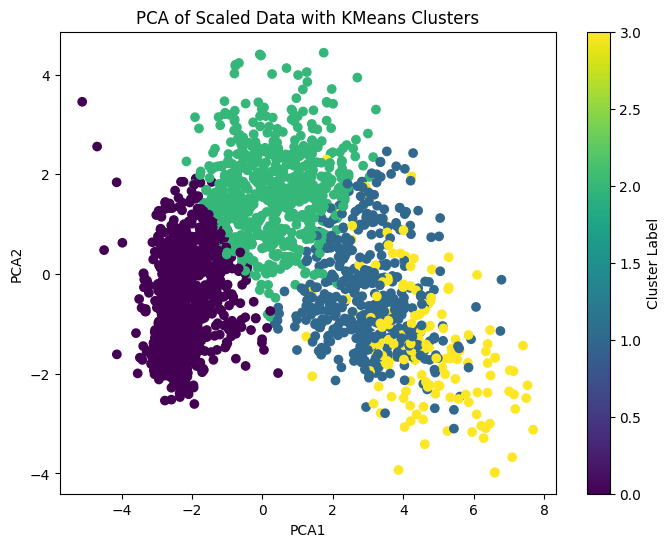

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans.labels_, cmap='viridis')
plt.title('PCA of Scaled Data with KMeans Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster Label')
plt.show()

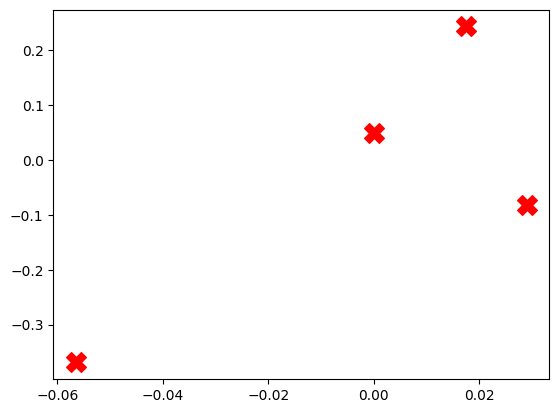

In [104]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

In [105]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4150522515827256


In [106]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 35748.48925804371


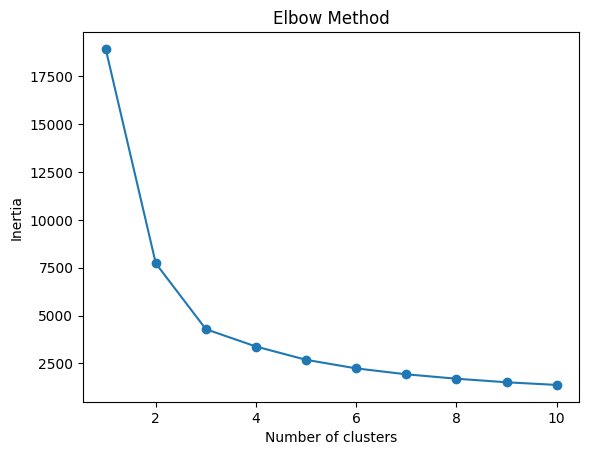

In [107]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [108]:
pca_df['Cluster'] = kmeans.labels_
print(pca_df.head())

       PCA1      PCA2  Cluster
0  3.761623 -0.072788        1
1 -2.367555  0.262615        9
2  1.614865  0.156438        5
3 -2.515312 -1.419715        2
4 -0.461227 -0.124581        8
